In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [182]:
df = pd.read_csv('final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [184]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [185]:
# Based on the info above we have some missing values. So I decided to add the median to compensate it.
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())

In [186]:
df.isna().count()

weight    119734
age       119734
height    119734
size      119734
dtype: int64

In [187]:
df.describe()

,weight,age,height
count,119734.000000,119734.000000,119734.000000
mean,61.756811,34.022959,165.803849
std,9.944863,8.141237,6.728462
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


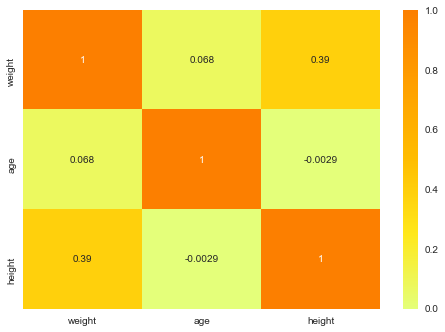

In [188]:
# Getting a correlation matrix

sns.heatmap(df.corr(), annot=True, cmap="Wistia")
plt.show()

According to the corr matrix height and weight are highly correlated

In [189]:
df['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

<AxesSubplot:xlabel='size', ylabel='count'>

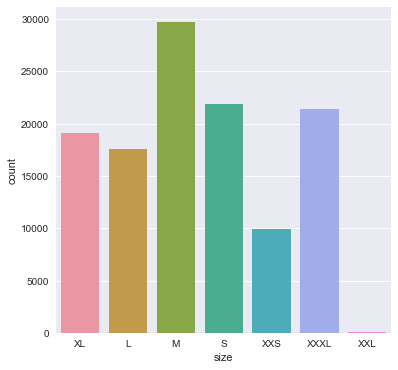

In [190]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize = (6,6))
sns.countplot(x=df['size'])

We have a high number of M size

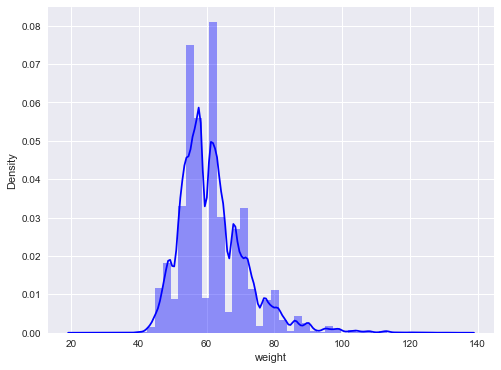

In [191]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["weight"], color="b");

The average weight seems to be btw 50 to 70 kilos

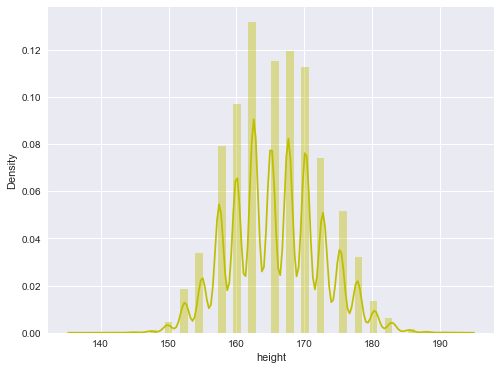

In [192]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["height"], color="y");

The average height seems to be btw 160 to 170 cm

In [193]:
df['size'] = df['size'].map({'XXS': 1, 'S': 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})
df.head()

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3


In [194]:
X = df.drop("size", axis=1)
X.head()

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72


In [195]:
# y data
y = df["size"]
y.head()

0    5
1    4
2    3
3    4
4    3
Name: size, dtype: int64

Training the model

In [196]:
# Separating test and train using the function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [197]:
len(X_train), len(X_test)

(95787, 23947)

Linear Regression vs Random Forest vs KN Neighbors

In [219]:
# Creating the models
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(42)

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()


In [220]:
# Training the models
lr_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
kn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [221]:
#Forecast Linear Regression
lr_model.predict(X_test)


array([3.85013586, 2.74739016, 4.66301896, ..., 2.40269827, 3.69984656,
       2.13015899])

In [222]:
#Forecast Random Forest
rf_model.predict(X_test)

array([3, 2, 5, ..., 3, 3, 2], dtype=int64)

In [223]:
#NK Forest
kn_model.predict(X_test)

array([3, 2, 5, ..., 2, 3, 2], dtype=int64)

In [224]:
#Tree Forest
tree_model.predict(X_test)

array([3, 2, 5, ..., 2, 3, 2], dtype=int64)

In [225]:
LinearRegressionScore = lr_model.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)
RandomForestClassifierScore = rf_model.score(X_test,y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)
KNeighborsClassifierScore = kn_model.score(X_test,y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)
DecisionTreeClassifierScore = tree_model.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Linear Regression model: 64.36940126353743
Accuracy obtained by Random Forest Classifier model: 51.20891969766568
Accuracy obtained by K Neighbors Classifier model: 51.24232680502777
Accuracy obtained by Decision Tree Classifier model: 50.84561740510294


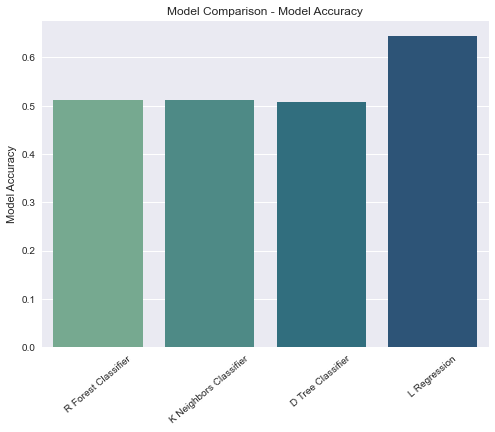

In [226]:
plt.style.use("seaborn")

x = ["R Forest Classifier", 
     "K Neighbors Classifier", 
     "D Tree Classifier", 
     "L Regression"]

y = [RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     DecisionTreeClassifierScore, 
     LinearRegressionScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");